# Importaciones necesarias

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.image as image
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1 as ff1
import fastf1.plotting
from fastf1.core import Laps
import matplotlib.cbook as cbook
import matplotlib.image as image

In [2]:
# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

In [3]:
# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [4]:
# Solicitar variables
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
piloto1 = input('Piloto 1: ')
piloto2 = input('Piloto 2: ')

Año: 2022
Round: 22
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto 1: PER
Piloto 2: LEC


# Carga de la sesión

In [5]:
session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '55', '63', '4', '31', '18', '3', '5', '22', '24', '23', '10', '77', '47', '20', '44', '6', '14']


# Listado de pilotos

In [6]:
drivers = pd.unique(session.laps['Driver'])
drivers
# seleccionar un solo piloto drivers[0] - SAI

array(['VER', 'LEC', 'PER', 'SAI', 'RUS', 'NOR', 'OCO', 'STR', 'RIC',
       'VET', 'TSU', 'ZHO', 'ALB', 'GAS', 'BOT', 'MSC', 'MAG', 'HAM',
       'LAT', 'ALO'], dtype=object)

# Listado de Equipos

In [7]:
teams = pd.unique(session.laps['Team'])
teams

array(['Red Bull Racing', 'Ferrari', 'Mercedes', 'McLaren', 'Alpine',
       'Aston Martin', 'AlphaTauri', 'Alfa Romeo', 'Williams',
       'Haas F1 Team'], dtype=object)

In [8]:
session.results[0:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:27:45.914000,Finished,25.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,2.0,3.0,NaT,NaT,NaT,0 days 01:27:54.685000,Finished,18.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,3.0,2.0,NaT,NaT,NaT,0 days 01:27:56.007000,Finished,15.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,4.0,4.0,NaT,NaT,NaT,0 days 01:28:10.806000,Finished,12.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,5.0,6.0,NaT,NaT,NaT,0 days 01:28:21.802000,Finished,10.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,6.0,7.0,NaT,NaT,NaT,0 days 01:28:42.148000,Finished,9.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,7.0,8.0,NaT,NaT,NaT,0 days 01:28:43.154000,Finished,6.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,8.0,14.0,NaT,NaT,NaT,0 days 01:29:02.845000,Finished,4.0
3,3,D RICCIARDO,RIC,McLaren,f58020,Daniel,Ricciardo,Daniel Ricciardo,9.0,13.0,NaT,NaT,NaT,0 days 01:29:09.182000,Finished,2.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,10.0,9.0,NaT,NaT,NaT,0 days 01:29:09.812000,Finished,1.0


# tabla de vueltas más rápidas

In [9]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [10]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [11]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     NOR 0 days 00:01:28.391000        0 days 00:00:00
1     RUS 0 days 00:01:28.836000 0 days 00:00:00.445000
2     SAI 0 days 00:01:28.879000 0 days 00:00:00.488000
3     PER 0 days 00:01:28.972000 0 days 00:00:00.581000
4     OCO 0 days 00:01:29.333000 0 days 00:00:00.942000
5     VER 0 days 00:01:29.392000 0 days 00:00:01.001000
6     TSU 0 days 00:01:29.489000 0 days 00:00:01.098000
7     ZHO 0 days 00:01:29.600000 0 days 00:00:01.209000
8     STR 0 days 00:01:29.620000 0 days 00:00:01.229000
9     LEC 0 days 00:01:29.719000 0 days 00:00:01.328000
10    HAM 0 days 00:01:29.788000 0 days 00:00:01.397000
11    MSC 0 days 00:01:29.833000 0 days 00:00:01.442000
12    ALB 0 days 00:01:29.939000 0 days 00:00:01.548000
13    LAT 0 days 00:01:30.309000 0 days 00:00:01.918000
14    VET 0 days 00:01:30.312000 0 days 00:00:01.921000
15    BOT 0 days 00:01:30.352000 0 days 00:00:01.961000
16    ALO 0 days 00:01:30.579000 0 days 00:00:02

In [12]:
# Graficador

In [13]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    print(lap['Team'])
    if pd.isnull(lap['Team']):
        color = '#000000'
    else:
        color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

McLaren
Mercedes
Ferrari
Red Bull Racing
Alpine
Red Bull Racing
AlphaTauri
Alfa Romeo
Aston Martin
Ferrari
Mercedes
Haas F1 Team
Williams
Williams
Aston Martin
Alfa Romeo
Alpine
McLaren
AlphaTauri
Haas F1 Team


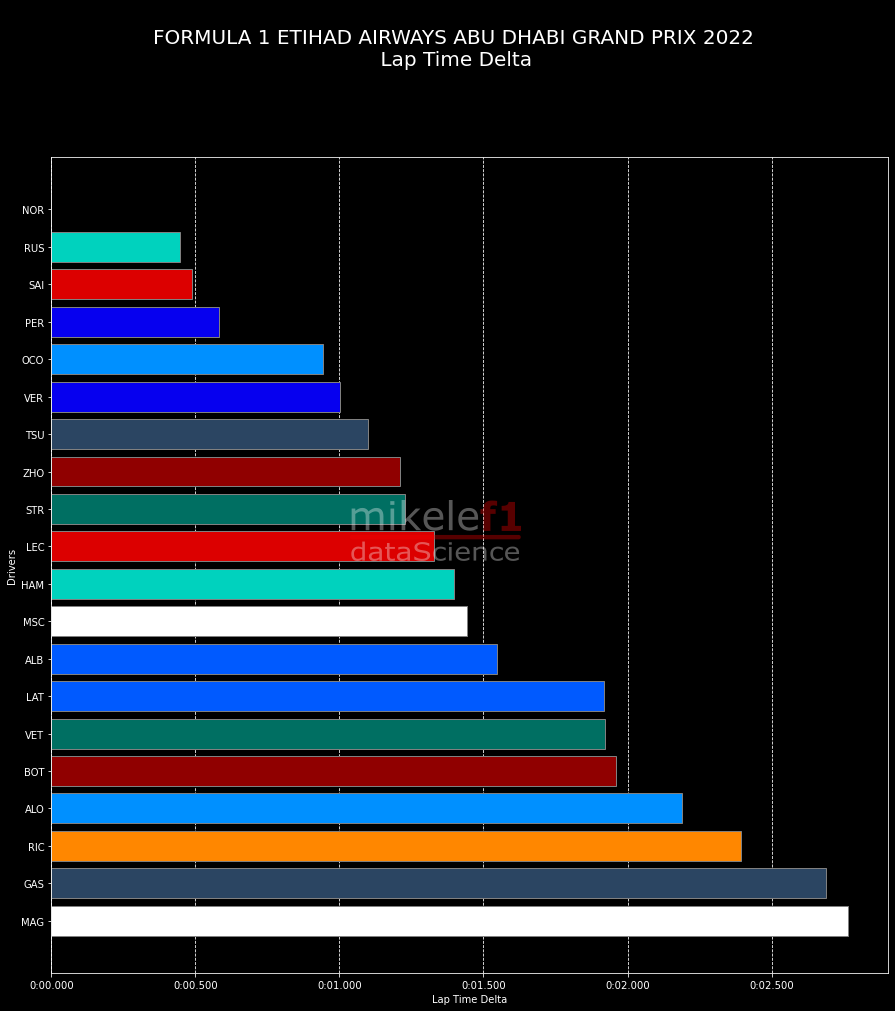

In [15]:
#with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
#    im = image.imread(file)

im = image.imread('./images/logog.png')
    #Modo oscuro
plt.style.use('dark_background')

fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [15, 15]

# Etiquetas Verticales | Pilotos
ax.set_yticks(fastest_laps.index,labels=fastest_laps['Driver'])
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')

ax.invert_yaxis()
# Etiquetas
ax.set_ylabel('Drivers')
ax.set_xlabel('Lap Time Delta')
session.event
#ax.set_title(session.event['OfficialEventName'])
plt.suptitle(f"\n{session.event['OfficialEventName']} \n Lap Time Delta \n"
             , size=20, y=1.02)
# Barras
# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='white', zorder=-1000)

#fig.figimage(im, 3, 3, zorder=13, alpha=.35)
fig.figimage(im, xo=350, yo=450, zorder=13, alpha=.35)

nombrearchivo = str(year)+'-'+str(wknd)+'-LTD-'+ses+'.png'
plt.savefig(nombrearchivo)

#Mostrar gráfico
#plt.savefig('2022-13-RLTD.png')
plt.show()